In [0]:
# https://keras.io/
!pip install -q keras
import keras

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


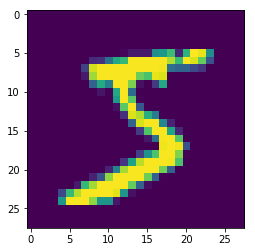

In [7]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [10]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [12]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [36]:
#added batch normalization, activation after every convolution except for the last one
from keras.layers import Activation,BatchNormalization

#Initialize linear stack model and add layers to it
model = Sequential()

# Input image = 28x28 with 1 channel
# Convolved with 3x3 with 16 kernels
# Output image will be = 26x26 with 16 channels
# Global Receptive field = 3x3
# Relu activation - linear activation function with not passing values < 0

model.add(Convolution2D(8, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(BatchNormalization())


# Input image = 26x26 with 16 channels
# Convolved with 3x3 with 16 kernels
# Output image will be = 24x24 with 16 channels
# Global Receptive field = 5x5
# Relu activation
model.add(Convolution2D(16, 3, 3))
model.add(Activation('relu'))
model.add(BatchNormalization())



# Input image = 24x24 with 16 channels
# Convolved with 3x3 with 16 kernels
# Output image will be = 22x22 with 16 channels
# Global Receptive field = 7x7
# Relu activation
# Dropout 0.10
model.add(Convolution2D(16, 3, 3))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.10))


# Input image = 22x22 with 16 channels
# Maxpooled with 2x2
# Output image will be = 11x11 with 16 channels
# Global Receptive field = 14x14
model.add(MaxPooling2D(pool_size=(2, 2)))

#---------------------MP------------------------#

# Input image = 11x11 with 16 channels
# Convolved with 3x3 with 16 kernels
# Output image will be = 9x9 with 16 channels
# Global Receptive field = 16x16
# Relu activation
model.add(Convolution2D(16, 3, 3))
model.add(Activation('relu'))
model.add(BatchNormalization())



# Input image = 9x9 with 16 channels
# Convolved with 3x3 with 16 kernels
# Output image will be = 7x7 with 16 channels
# Global Receptive field = 18x18
# Relu activation
model.add(Convolution2D(16, 3, 3))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.10))

# Input image = 7x7 with 16 channels
# Convolved with 1x1 with 10 kernels
# Output image will be = 7x7 with 10 channels
# Global Receptive field = 18x18
# Relu activation
model.add(Convolution2D(10, 1, activation='relu')) 
#model.add(BatchNormalization())

# Input image = 7x7 with 10 channels
# Convolved with 7x7 with 10 kernels
# Output image will be = 1x1 with 10 channels
# Global Receptive field = 24x24
model.add(Convolution2D(10, 7))




model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3))`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3))`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:52: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3))`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:63: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3))`


In [37]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_29 (Conv2D)           (None, 26, 26, 8)         80        
_________________________________________________________________
batch_normalization_22 (Batc (None, 26, 26, 8)         32        
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 24, 24, 16)        1168      
_________________________________________________________________
activation_21 (Activation)   (None, 24, 24, 16)        0         
_________________________________________________________________
batch_normalization_23 (Batc (None, 24, 24, 16)        64        
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 22, 22, 16)        2320      
_________________________________________________________________
activation_22 (Activation)   (None, 22, 22, 16)        0         
__________

In [0]:
from keras.optimizers import SGD

model.compile(loss='categorical_crossentropy',
             optimizer=SGD(lr=0.01),
             metrics=['accuracy'])

In [42]:
model.fit(X_train, Y_train, batch_size=64, nb_epoch=15, verbose=1,validation_data=(X_test, Y_test)) #Increased batch_size and epochs

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 18s 292us/step - loss: 0.0268 - acc: 0.9918 - val_loss: 0.0347 - val_acc: 0.9891
Epoch 2/15
60000/60000 [==============================] - 16s 263us/step - loss: 0.0257 - acc: 0.9918 - val_loss: 0.0340 - val_acc: 0.9897
Epoch 3/15
60000/60000 [==============================] - 16s 264us/step - loss: 0.0246 - acc: 0.9925 - val_loss: 0.0323 - val_acc: 0.9899
Epoch 4/15
60000/60000 [==============================] - 16s 262us/step - loss: 0.0229 - acc: 0.9927 - val_loss: 0.0356 - val_acc: 0.9884
Epoch 5/15
60000/60000 [==============================] - 16s 260us/step - loss: 0.0223 - acc: 0.9932 - val_loss: 0.0334 - val_acc: 0.9892
Epoch 6/15
60000/60000 [==============================] - 16s 262us/step - loss: 0.0218 - acc: 0.9934 - val_loss: 0.0335 - val_acc: 0.9890
Epoch 7/15
60000/60000 [==============================] - 16s 263us/step - loss: 0.0222 - acc: 0.9933 - val_loss: 0.

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [44]:
print(score)

[0.029084908887700295, 0.9905]


###Iteration 3

*   Decreased the number of parameters by following right architecture
*   Total params: **13,576**
Trainable params: **13,432**
Non-trainable params: **144**


---



*   The architecture is changed to fit in lesser parameters by reducing the architecture to 7x7 using 3x3, and using 7x7x10 in the end step convolution.
*   Added dropout of 0.10 before maxpopoling and before 1x1 layer at the last
*   Added SGD as optimizer with learning rate set to 0.01
*   Reduced batch size and increased number of epochs

---


*   Final accuracy in print score is **99.05**



In [0]:
y_pred = model.predict(X_test)

In [0]:
print(y_pred[:9])
print(y_test[:9])

[[2.65240683e-08 1.18532213e-07 6.82957113e-09 2.36506662e-06
  5.53020755e-07 3.15221655e-07 3.58774427e-10 9.99996185e-01
  6.68363285e-08 4.40338880e-07]
 [7.45374393e-07 6.19956836e-06 9.99991179e-01 3.93931154e-09
  1.86378885e-10 2.58443422e-09 1.93876781e-06 1.23214605e-09
  3.36232802e-08 1.62984310e-08]
 [3.04421222e-09 9.99997973e-01 6.22365448e-08 7.03355096e-10
  7.92090304e-08 6.53388611e-07 7.78712888e-07 3.70373442e-07
  1.20962285e-09 1.44949253e-08]
 [9.99962926e-01 4.32575682e-08 9.63080993e-07 4.96210419e-07
  5.86626001e-08 2.44341749e-07 2.95349473e-05 2.87382335e-07
  3.32717173e-06 2.17356569e-06]
 [2.63894595e-09 3.60973189e-08 2.16760609e-09 5.25380434e-11
  9.99997735e-01 1.01465545e-07 6.26666647e-08 4.01112715e-07
  5.83290569e-11 1.69788780e-06]
 [8.89393448e-09 9.99999046e-01 4.20446034e-09 8.76973928e-12
  4.00140294e-08 4.27570427e-07 3.03514810e-07 2.07334722e-07
  3.83560828e-09 2.34416966e-08]
 [1.21131716e-10 1.20769187e-06 7.11198322e-10 8.99541952e

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_14'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()

KeyError: ignored